# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [1]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def exp_feature_adder(x, number_of_exp_feature):
    fAddX = np.ones((x.shape[0], 1))
    for i in range(1, number_of_exp_feature+1):
        fAddX = np.hstack((fAddX, np.power(x,i)))
    return fAddX

In [4]:
def solve_MLE(A, b, m):
    A = np.array(A)
    A = np.reshape(A, (A.shape[0], 1))
    A = exp_feature_adder(A, m)
    #
    b = np.array(b)
    b = np.reshape(b, (b.shape[0], 1))
   #
    x = np.linalg.solve(A.T@A, A.T@b)
    return x, A

Text(0.5, 0, 'for exponential 3')

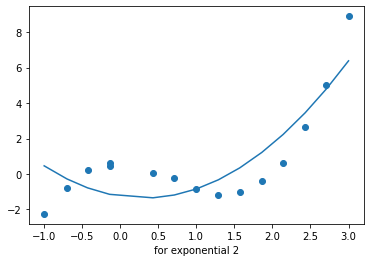

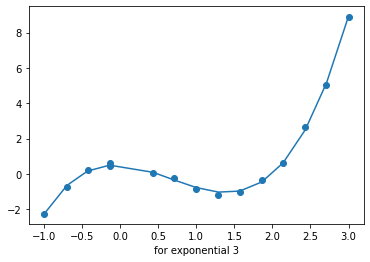

In [5]:
sol, fAddx = solve_MLE(x, y, 2)
#
plt.scatter(x, y)
plt.plot(x, fAddx@sol)
plt.xlabel("for exponential 2")
#####################
sol, fAddx = solve_MLE(x, y, 3)
#
plt.figure()
plt.scatter(x, y)
plt.plot(x, fAddx@sol)
plt.xlabel("for exponential 3")

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

3 is the right value for m


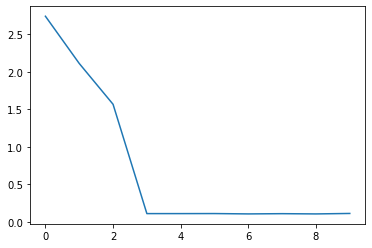

In [16]:
n = len(x)
ros = []
for i in range(10):
    sol, fAddx = solve_MLE(x, y, i)
    y = np.reshape(y, (len(y), 1))
    ro2 = 1 / (n - i) * np.sum(np.power((fAddx@sol - y), 2))
    ro = np.sqrt(ro2)
    ros.append(ro)
plt.plot(ros)
print('3 is the right value for m')

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

In [ ]:
# ... ENTER YOUR CODE HERE

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...